In [3]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings("ignore")

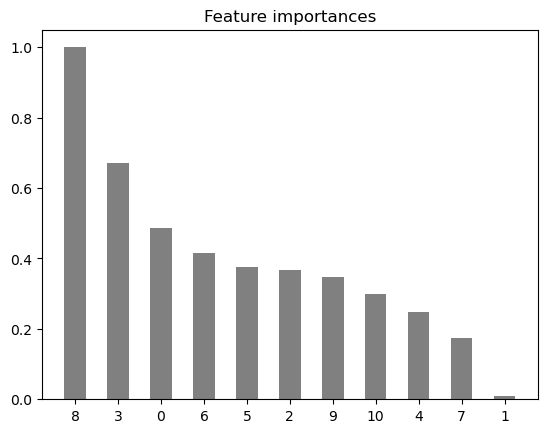

In [20]:
df = pd.read_excel(r'..\..\Data\相关性最新.xlsx')
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
aver = X.mean(axis=0)
X = X.fillna(aver)
from model.UniVarSelector import UniVarSelector
%matplotlib inline
uni = UniVarSelector(X, y)
uni.fit()
uni.plot()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
aver = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-aver)/std
X_test = (X_test-aver)/std

In [21]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [22]:
y_train, y_test = y_train - 1, y_test - 1

[0]	validation_0-mlogloss:1.50443
[1]	validation_0-mlogloss:1.42434
[2]	validation_0-mlogloss:1.35049
[3]	validation_0-mlogloss:1.29048
[4]	validation_0-mlogloss:1.23552
[5]	validation_0-mlogloss:1.17905
[6]	validation_0-mlogloss:1.13264
[7]	validation_0-mlogloss:1.10754
[8]	validation_0-mlogloss:1.07619
[9]	validation_0-mlogloss:1.04117
[10]	validation_0-mlogloss:1.00858
[11]	validation_0-mlogloss:0.98270
[12]	validation_0-mlogloss:0.95679
[13]	validation_0-mlogloss:0.94285
[14]	validation_0-mlogloss:0.92583
[15]	validation_0-mlogloss:0.91198
[16]	validation_0-mlogloss:0.90453
[17]	validation_0-mlogloss:0.88954
[18]	validation_0-mlogloss:0.87676
[19]	validation_0-mlogloss:0.87217


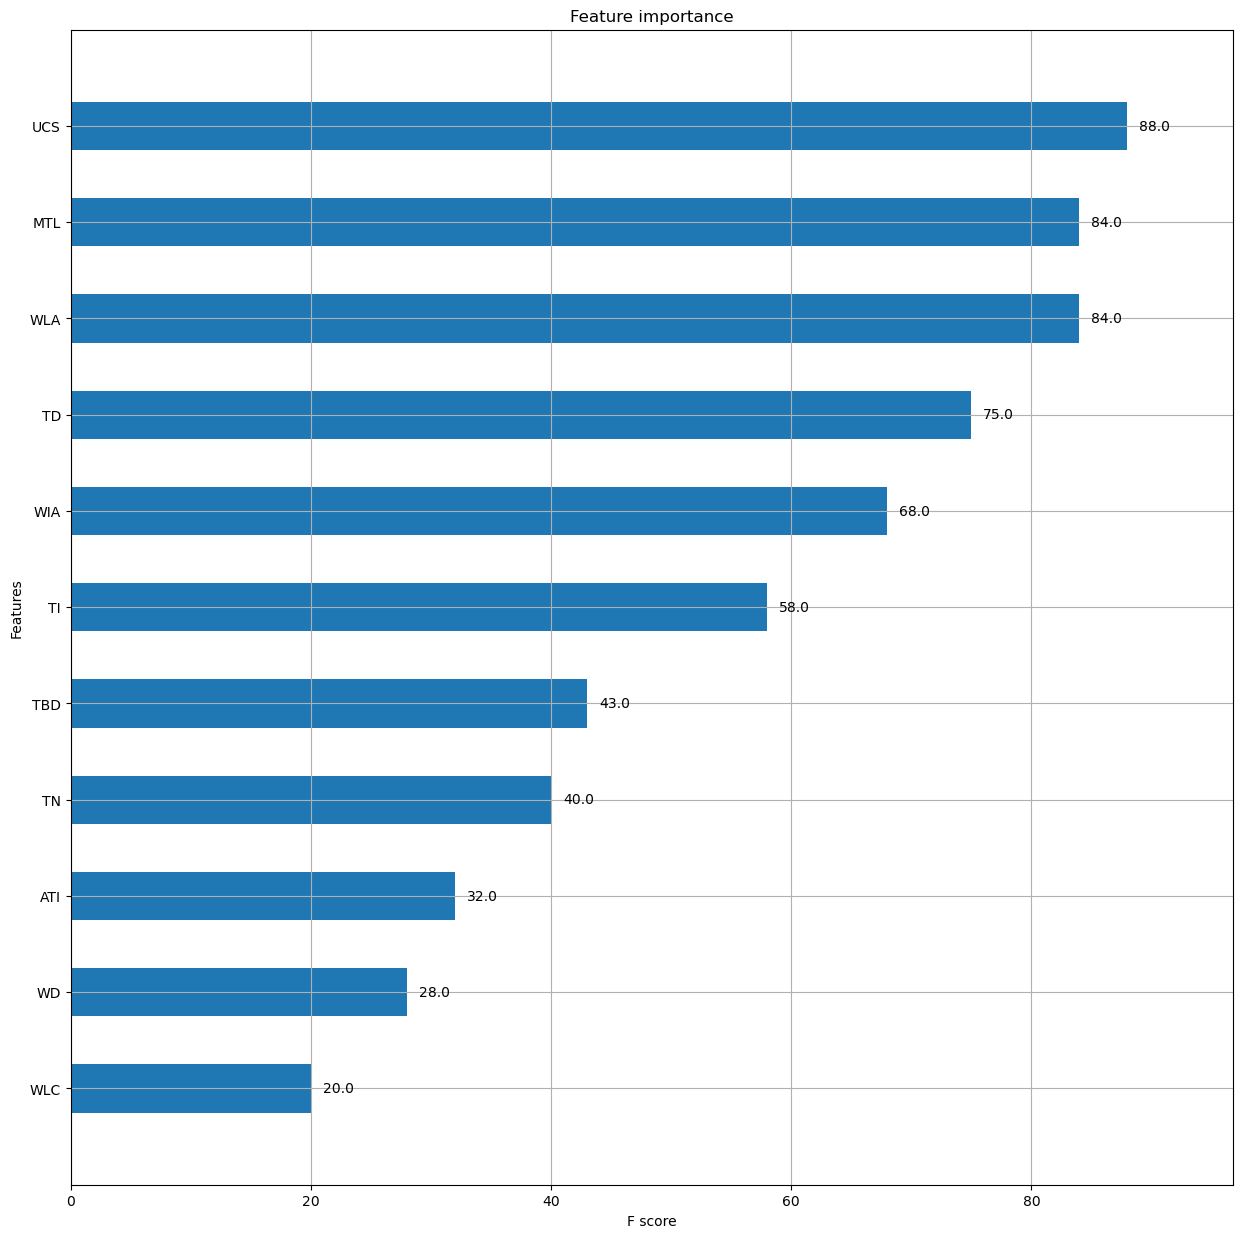

准确率: 75.00%


In [23]:
xgb_classifier = xgb.XGBClassifier(n_estimators=20,max_depth=4,learning_rate=0.1, colsample_bytree=0.8, random_state=1)
xgb_classifier.fit(X_train, y_train, eval_set = [(X_test,y_test)], eval_metric = "mlogloss", early_stopping_rounds = 10,verbose = True)
fig,ax = plt.subplots(figsize=(15,15))
xgb.plot_importance(xgb_classifier, height=0.5, ax=ax, max_num_features=64)
plt.show()
### 模型正确率
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("准确率: %.2f%%" % (accuracy*100.0))

In [24]:
depth = [3, 4, 5, 6, 8, 10]
for i in depth:
    xgb_classifier = xgb.XGBClassifier(n_estimators=20,max_depth=i,learning_rate=0.05, colsample_bytree=0.8, random_state=2)
    xgb_classifier.fit(X_train, y_train, eval_set = [(X_test,y_test)], eval_metric = "mlogloss", early_stopping_rounds = 10,verbose = False)
    y_pred = xgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("max_depth为%d时的准确率: %.2f%%" % (i, accuracy*100.0))

max_depth为3时的准确率: 71.88%
max_depth为4时的准确率: 68.75%
max_depth为5时的准确率: 65.62%
max_depth为6时的准确率: 71.88%
max_depth为8时的准确率: 71.88%
max_depth为10时的准确率: 71.88%


In [25]:
n_estimators = [20, 40, 50, 60, 80, 100]
for n in n_estimators:
    xgb_classifier = xgb.XGBClassifier(n_estimators=n, max_depth=3,learning_rate=0.01, subsample=0.8, colsample_bytree=1, random_state=19)
    xgb_classifier.fit(X_train, y_train, eval_set = [(X_test,y_test)], eval_metric = "mlogloss", early_stopping_rounds = 10,verbose = False)
    y_pred = xgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("n_estimators为%d时的准确率: %.2f%%" % (n, accuracy*100.0))

n_estimators为20时的准确率: 59.38%
n_estimators为40时的准确率: 65.62%
n_estimators为50时的准确率: 68.75%
n_estimators为60时的准确率: 71.88%
n_estimators为80时的准确率: 68.75%
n_estimators为100时的准确率: 68.75%


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
learning_rate = [0.01, 0.02, 0.03, 0.05, 0.1]
s = []
b = []
for i in range(20):
    b=[]
    print('第%d次训练：' % (i))
    for l in learning_rate:
        xgb_classifier = xgb.XGBClassifier(n_estimators=40, max_depth=3, learning_rate=l, subsample=0.8, colsample_bytree=1, random_state=i)
        xgb_classifier.fit(X_train, y_train, eval_set = [(X_test,y_test)], eval_metric = "mlogloss", early_stopping_rounds = 10,verbose = False)
        y_pred = xgb_classifier.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        b.append(accuracy)
        print("learning_rate为%.3f时的准确率: %.2f%%" % (l, accuracy*100.0))
    s.append(learning_rate[np.argmax(b)])
print(s)

第0次训练：
learning_rate为0.010时的准确率: 65.62%
learning_rate为0.020时的准确率: 68.75%
learning_rate为0.030时的准确率: 68.75%
learning_rate为0.050时的准确率: 68.75%
learning_rate为0.100时的准确率: 75.00%
第1次训练：
learning_rate为0.010时的准确率: 75.00%
learning_rate为0.020时的准确率: 75.00%
learning_rate为0.030时的准确率: 75.00%
learning_rate为0.050时的准确率: 71.88%
learning_rate为0.100时的准确率: 75.00%
第2次训练：
learning_rate为0.010时的准确率: 71.88%
learning_rate为0.020时的准确率: 75.00%
learning_rate为0.030时的准确率: 75.00%
learning_rate为0.050时的准确率: 75.00%
learning_rate为0.100时的准确率: 71.88%
第3次训练：
learning_rate为0.010时的准确率: 75.00%
learning_rate为0.020时的准确率: 75.00%
learning_rate为0.030时的准确率: 75.00%
learning_rate为0.050时的准确率: 71.88%
learning_rate为0.100时的准确率: 71.88%
第4次训练：
learning_rate为0.010时的准确率: 71.88%
learning_rate为0.020时的准确率: 71.88%
learning_rate为0.030时的准确率: 71.88%
learning_rate为0.050时的准确率: 68.75%
learning_rate为0.100时的准确率: 75.00%
第5次训练：
learning_rate为0.010时的准确率: 65.62%
learning_rate为0.020时的准确率: 68.75%
learning_rate为0.030时的准确率: 71.88%
learning_rate为0.050时的准确率: 65.62%
l

In [27]:
print(s)
from sklearn.metrics import classification_report

xgb_classifier = xgb.XGBClassifier(n_estimators=40, max_depth=3, learning_rate=0.01, subsample=0.8, colsample_bytree=1,
                                   random_state=1)
xgb_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="mlogloss", early_stopping_rounds=10,
                   verbose=False)
y_pred = xgb_classifier.predict(X_train)
y_hat = xgb_classifier.predict(X_test)
print("训练集效果：")
print(classification_report(y_pred, y_train))
print("测试集效果：")
print(classification_report(y_test, y_hat))
from sklearn import metrics

[0.1, 0.01, 0.02, 0.01, 0.1, 0.03, 0.02, 0.1, 0.05, 0.1, 0.1, 0.01, 0.01, 0.02, 0.02, 0.03, 0.01, 0.02, 0.03, 0.05]
训练集效果：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.85      0.94      0.89        18
           2       0.83      1.00      0.91        25
           3       0.98      0.81      0.89        70
           4       0.64      1.00      0.78         7

    accuracy                           0.89       128
   macro avg       0.84      0.95      0.88       128
weighted avg       0.91      0.89      0.89       128

测试集效果：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.50      0.67         4
           2       0.91      0.77      0.83        13
           3       0.62      0.91      0.74        11
           4       0.50      0.33      0.40         3

    accuracy                           0.75        32
 

In [28]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    # clf.fit(X_train, y_train)

    print ("训练集精度:")   # 训练集精度
    print (clf.score(X_train, y_train))

    print ("\n测试集精度:")    # 测试集精度
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)

    print ("\n分类识别报告:")      # 分类识别报告
    print (metrics.classification_report(y_test, y_pred))

    # print ("\n混淆矩阵:")
    # print (metrics.confusion_matrix(y_test, y_pred))
train_and_evaluate(xgb_classifier, X_train, X_test, y_train, y_test)

训练集精度:
0.890625

测试集精度:
0.75

分类识别报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.50      0.67         4
           2       0.91      0.77      0.83        13
           3       0.62      0.91      0.74        11
           4       0.50      0.33      0.40         3

    accuracy                           0.75        32
   macro avg       0.81      0.70      0.73        32
weighted avg       0.79      0.75      0.75        32


In [15]:
print("finish$")

finish$
